# <font color='blue'> Teste de Hipótese para a média com variância conhecida


## Alunos:
###              João Pedro Farjoun Silva, 13731319
###              Felipe Destaole , 13686768
###              Bruno Dalcantoni Cozac, 13686323
----


### Iremos fazer nesse trabalho um teste de hipótese referente à seguinte situação hipotética:

### <font color='red'> Introdução

### Na movimentada cidade de Techville, a empresa de telecomunicações ConnectCo operava um dos maiores call centers da região. A eficiência do atendimento ao cliente sempre foi um dos principais focos da empresa, pois sabiam que um bom serviço de atendimento era crucial para manter a satisfação e a lealdade dos clientes.

### <font color='red'> O Desafio 
### Em um dia como outro qualquer, Carla, a gerente do call center, recebeu um relatório preocupante. A média de tempo de atendimento ao cliente estava aumentando, chegando a 8 minutos por chamada, enquanto a meta estabelecida era de 5 minutos. Sabendo que a variância do tempo de atendimento era de 4 minutos, Carla decidiu que era hora de investigar mais a fundo e tomar medidas corretivas.

### <font color='red'> A Hipótese
### Após um mês, Carla convocou uma reunião com sua equipe de analistas de dados. Eles decidiram testar a hipótese de que o tempo médio de atendimento desse novo mês seria menor que o anterior. A equipe formulou as seguintes hipóteses:

$X_i \sim N(\mu , \sigma^2)$ com $\sigma^2 conhecido = 2^2 $

$X_1, \ldots, X_n$ amostra aleatória

$H_0: \mu = 5 $ 

Contra

$H_1: \mu < 5 $

$RC = \{\bar{x} \in \mathbb{R}; \bar{x} < x_c\}$

In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df2 = pd.read_csv('dados_teste2.csv')
print(df2)

   Momento  Tempo de demora
0   2° mes         3.042326
1   2° mes         3.556875
2   2° mes         7.300794
3   2° mes         6.173816
4   2° mes         6.367504
5   2° mes         3.569123
6   2° mes         4.466710
7   2° mes         3.552829
8   2° mes         1.638396
9   2° mes         7.622347
10  2° mes         3.284055
11  2° mes         2.005762
12  2° mes         5.867717
13  2° mes         3.946920
14  2° mes         4.914028
15  2° mes         6.105475
16  2° mes         1.293920
17  2° mes         8.245623
18  2° mes         4.234163
19  2° mes         3.691950
20  2° mes         5.601087
21  2° mes         4.797230
22  2° mes         2.278599
23  2° mes         0.373298
24  2° mes         6.095337
25  2° mes         7.682439
26  2° mes         6.396403
27  2° mes         5.277725
28  2° mes         6.132682
29  2° mes         3.286253
30  2° mes         5.338221
31  2° mes         5.423398
32  2° mes         7.913551
33  2° mes         5.546019
34  2° mes         6

In [12]:
# Dados já fornecidos

mu0 = 5
sigma = 2
n=len(df2['Tempo de demora']) 

xc = norm.ppf(0.05)*(sigma/np.sqrt(n)) + mu0

print('RC = {xbarra <', np.round(xc,2), '}')

RC = {xbarra < 4.53 }


In [13]:
xbarra = sum(df2['Tempo de demora'])/len(df2['Tempo de demora'])

print(xbarra)

if xbarra < xc: 
    print ('Rejeito H0')
else: 
    print('Não rejeito H0')

4.891560687548601
Não rejeito H0


### Como a média dos dados do segundo mês não está na região crítica, isto é, ela não é menor que 4.53, então temos evidências amostrais suficientes de que essa média é igual à meta de 5. Logo, não rejeitamos a hipótese de H0.

In [8]:
# Nível descritivo do teste

z_obs = (xbarra - mu0)/(sigma/np.sqrt(n))

print('valor-p', np.round(norm.cdf(z_obs),6))

valor-p 0.350715


In [9]:
import seaborn as sns

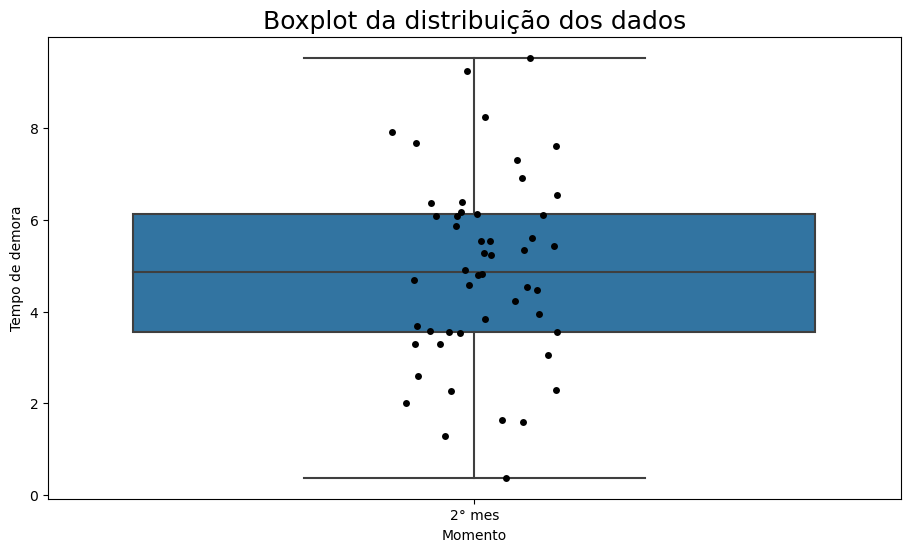

In [10]:
plt.figure(figsize =(11, 6))

ax = sns.boxplot(data=df2,x='Momento',y='Tempo de demora')

ax = sns.stripplot(data=df2,x='Momento',y='Tempo de demora',color='black')

# Adicionando Título ao gráfico
plt.title("Boxplot da distribuição dos dados", loc="center", fontsize=18)
plt.xlabel("Momento")
plt.ylabel("Tempo de demora")

plt.show()

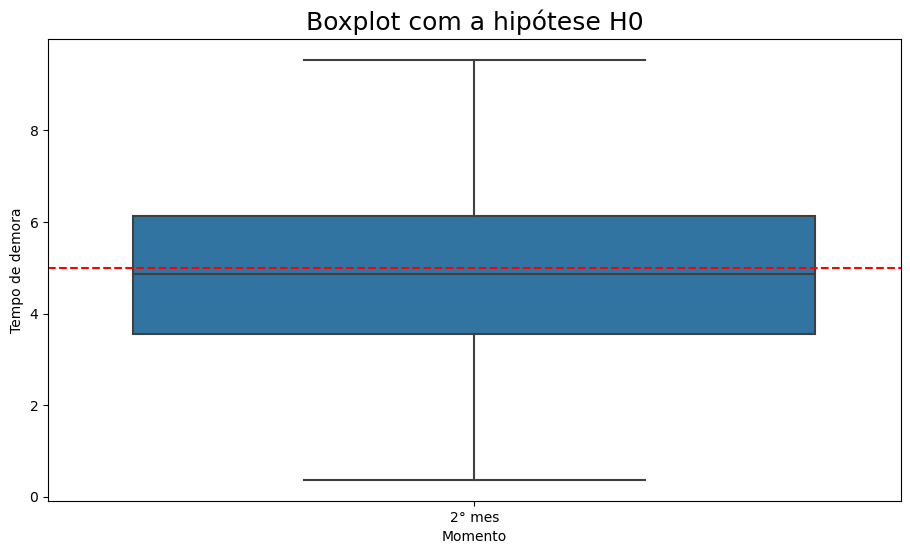

In [11]:
plt.figure(figsize =(11, 6))

ax = sns.boxplot(data=df2,x='Momento',y='Tempo de demora')

ax = plt.axhline(y=mu0, color='r', linestyle='--', label=f'Mean: {mu0:.2f}')

# Adicionando Título ao gráfico
plt.title("Boxplot com a hipótese H0", loc="center", fontsize=18)
plt.xlabel("Momento")
plt.ylabel("Tempo de demora")

plt.show()

### Como podemos ver, o resultado do teste concorda com o boxplot, já que está dentro da caixa(onde os dados foram gerados de maneira simétrica) e bem perto da mediana(linha preta no meio da caixa). Com isso, não há forte evidências para rejeitar H0.

### Com isso, ainda que a meta não tenha sido batida, o tempo médio de atendimento diminuiu consideravelmente de um mês para o outro.